In [2]:
# Scripts to generate ROC, Length profiles, Time series, Box plots, and other figures for the 2020 Gu, Deng, Lee et al. Nature Medicine manuscript "Rapid Pathogen Detection by Metagenomic Next-Generation Sequencing of Infected Body Fluids"
# Code by Wei Gu, Maoshi Gu 2017-2020



# !/usr/bin/env python

import glob
import os
import sys
import ipdb
import numpy as np
import math
import pandas as pd
from pandas import compat
compat.PY3 = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from pylab import savefig
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


global indir
global graph_root
currentWorkingDirectory = os.getcwd()
#indir = currentWorkingDirectory + '/nanoporeData'
indir = currentWorkingDirectory
graph_root = currentWorkingDirectory + '/plots'
graph_labels = ['row','Species', 'RPM', 'adjustedRPM','microbial %','Hits', 'Truth','Run','RPMThreshold','sampleType','cycles','organism','total reads','dilution factor','nanodrop']
contingencyTable_labels = ['threshold_RPM','TP','FP','TN','FN','TPR','TNR','PPV','NPV']
sampleSheetFileName = "rd5-NPv3ValidateOrig-Bac"



In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


Few,Moderate,Numerous VS Enrichment Broth, Rare.  t value:  -0.19069265807573024 ; p value:  0.849573982565515
Few,Moderate,Numerous VS Enrichment Broth.  t value:  2.2437869586194963 ; p value:  0.027837624378675953
All but Enrich VS Enrichment Broth.  t value:  2.8038937056748425 ; p value:  0.006087697581807657
Rare VS Enrichment Broth.  t value:  1.8519486937984644 ; p value:  0.0825757575743116


Few,Moderate,Numerous VS Enrichment Broth, Rare.  Mann Whitney U statistic:  573.0 ; p value:  0.0038376853623240375
Few,Moderate,Numerous VS Enrichment Broth.  Mann Whitney U statistic:  53.0 ; p value:  0.00026168511826669136
All but Enrich VS Enrichment Broth.  Mann Whitney U statistic:  102.5 ; p value:  0.00097464474487163
Rare VS Enrichment Broth.  Mann Whitney U statistic:  25.0 ; p value:  0.015410931041605468


Text(0, 0.5, 'Pathogen Burden\n(Normalized Reads per Million)')

Text(0.5, 0, ' ')

(0.01, 100000)

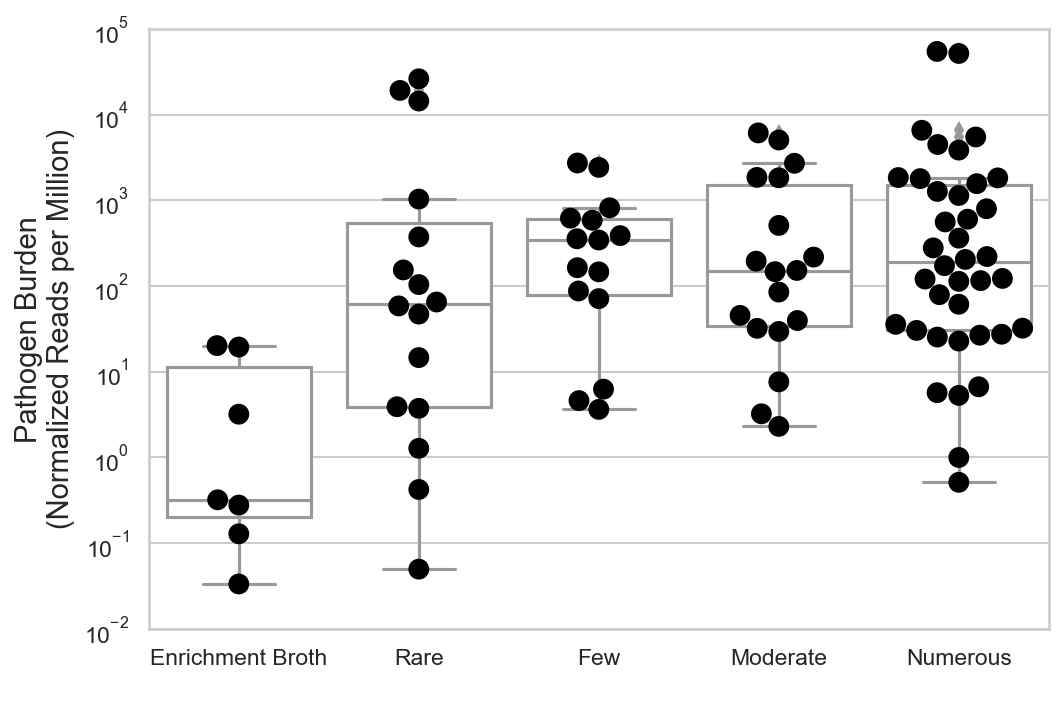

In [4]:
#Graph bacterial colony count

from matplotlib.pyplot import figure
from scipy import stats

fullGraphSheet = "fullGraph_df-rd5-v2TrainVal-Bac-colonyCount_EH.csv"
fullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

colonyQuant_labels = ['Negative','Enrichment Broth','Rare','Few','Moderate','Numerous']
#sampleType_labels = ['Enrichment Broth','Rare','Few','Moderate','Numerous']

subsetFullGraph_df = fullGraph_df[fullGraph_df['colonies'].isin(colonyQuant_labels)]


colonyQuantSubMost_labels = ['Enrichment Broth','Rare','Few','Moderate','Numerous']
colonyQuantSubHigh_labels = ['Few','Moderate','Numerous']
colonyQuantSubLow_labels = ['Enrichment Broth','Rare']
colonyQuantSubRare_labels = ['Rare']
colonyQuantSubVLow_labels = ['Enrichment Broth']
SubsetFewModNum_FullGraph_df = subsetFullGraph_df[subsetFullGraph_df['colonies'].isin(colonyQuantSubHigh_labels)]
SubsetEnrichRare_FullGraph_df = subsetFullGraph_df[subsetFullGraph_df['colonies'].isin(colonyQuantSubLow_labels)]
SubsetEnrich_FullGraph_df = subsetFullGraph_df[subsetFullGraph_df['colonies'].isin(colonyQuantSubVLow_labels)]
SubsetRare_FullGraph_df = subsetFullGraph_df[subsetFullGraph_df['colonies'].isin(colonyQuantSubRare_labels)]
SubsetNotEnrich_FullGraph_df = subsetFullGraph_df[subsetFullGraph_df['colonies'].isin(colonyQuantSubMost_labels)]
# get p value
t,p = stats.ttest_ind(SubsetFewModNum_FullGraph_df['adjustedRPM'].values, SubsetEnrichRare_FullGraph_df['adjustedRPM'].values, equal_var = False)
print ('Few,Moderate,Numerous VS Enrichment Broth, Rare.  t value: ', t, '; p value: ', p)
t,p = stats.ttest_ind(SubsetFewModNum_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values, equal_var = False)
print ('Few,Moderate,Numerous VS Enrichment Broth.  t value: ', t, '; p value: ', p)
t,p = stats.ttest_ind(SubsetNotEnrich_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values, equal_var = False)
print ('All but Enrich VS Enrichment Broth.  t value: ', t, '; p value: ', p)
t,p = stats.ttest_ind(SubsetRare_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values, equal_var = False)
print ('Rare VS Enrichment Broth.  t value: ', t, '; p value: ', p)

print ('\n')

MannWhitneyUstat,p = stats.mannwhitneyu(SubsetFewModNum_FullGraph_df['adjustedRPM'].values, SubsetEnrichRare_FullGraph_df['adjustedRPM'].values)
print ('Few,Moderate,Numerous VS Enrichment Broth, Rare.  Mann Whitney U statistic: ', MannWhitneyUstat, '; p value: ', p)
MannWhitneyUstat,p = stats.mannwhitneyu(SubsetFewModNum_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values)
print ('Few,Moderate,Numerous VS Enrichment Broth.  Mann Whitney U statistic: ', MannWhitneyUstat, '; p value: ', p)
MannWhitneyUstat,p = stats.mannwhitneyu(SubsetNotEnrich_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values)
print ('All but Enrich VS Enrichment Broth.  Mann Whitney U statistic: ', MannWhitneyUstat, '; p value: ', p)
MannWhitneyUstat,p = stats.mannwhitneyu(SubsetRare_FullGraph_df['adjustedRPM'].values, SubsetEnrich_FullGraph_df['adjustedRPM'].values)
print ('Rare VS Enrichment Broth.  Mann Whitney U statistic: ', MannWhitneyUstat, '; p value: ', p)

nonZeroFullGraph_df = subsetFullGraph_df.loc[(fullGraph_df['Hits'] != 0)]
nonZeroFullGraph_df = nonZeroFullGraph_df.sort_values(by=['adjustedRPM'], ascending=False)

plt.close()
fig = plt.figure(figsize=(6,4), dpi=150) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_yscale("log") # log first
fontparams = {'font.size':14, 'axes.labelsize':14, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':10}
plt.rcParams.update(fontparams)

#colorPaletteList = dict(TP='green',FP='red',TN='black', FN='orange')
#ordering = ['Negative','Enrichment Broth','Rare','Few','Moderate','Numerous']
ordering = ['Enrichment Broth','Rare','Few','Moderate','Numerous']

ax = sns.boxplot(x="colonies", y="adjustedRPM", data=nonZeroFullGraph_df, color="white", order=ordering, ax = log_ax)
ax = sns.swarmplot(x="colonies", y="adjustedRPM", dodge=True, data=nonZeroFullGraph_df, size=10, color='black', order=ordering, ax = log_ax)
#ax = sns.boxplot(x="colonies", y="RPM", data=nonZeroFullGraph_df, color="white", order=ordering, ax = log_ax)
#ax = sns.swarmplot(x="colonies", y="RPM", dodge=True, data=nonZeroFullGraph_df, color='black', order=ordering, ax = log_ax)
#ax = sns.barplot(x="colonies", y="adjustedRPM", hue='Truth', data=nonZeroFullGraph_df, order=ordering, ax = log_ax)



plt.ylabel('Pathogen Burden\n(Normalized Reads per Million)', fontsize=14)
plt.xlabel(' ', fontsize=12)
plt.ylim([0.01, 100000])


plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPMbyCultureColonies.pdf',format='pdf',transparent=True, bbox_inches='tight')


All Body fluids: 


(-0.02, 1)

(0, 1.02)

Text(0, 0.5, 'Positive Percent Agreement')

Text(0.5, 0, 'Negative Percent Agreement')

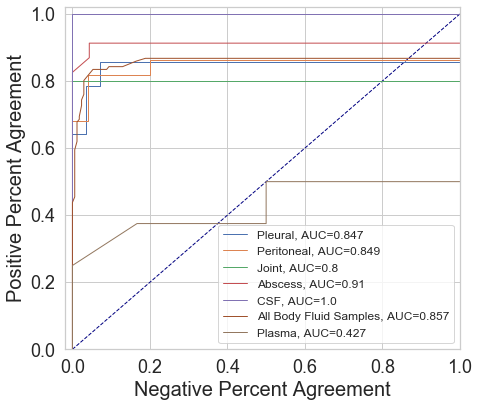

In [6]:
# Graph TPR veruss FPR for ROC

# read contingencyTableT_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac.csv"
contingencyTableT_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac-Peritoneal.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac-Pleural.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableC_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac-Abscess.csv"
contingencyTableC_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableD_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac-Joint.csv"
contingencyTableD_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableE_df
contingencyTableSheet = "contingencyTable_df-rd5-v2TrainVal-Bac-CSF.csv"
contingencyTableE_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableF_df
contingencyTableSheet = "contingencyTable_df-rd4-v7TrainVal-Plasma.csv"
contingencyTableF_df = pd.read_csv(indir + '/' + contingencyTableSheet)



# will use contingencyTable_df
TPR_T = contingencyTableT_df['TPR'].tolist()
FPR_T = contingencyTableT_df['FPR'].tolist()
PPV_T = contingencyTableT_df['PPV'].tolist()

TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()

TPR_C = contingencyTableC_df['TPR'].tolist()
FPR_C = contingencyTableC_df['FPR'].tolist()
PPV_C = contingencyTableC_df['PPV'].tolist()

TPR_D = contingencyTableD_df['TPR'].tolist()
FPR_D = contingencyTableD_df['FPR'].tolist()
PPV_D = contingencyTableD_df['PPV'].tolist()

TPR_E = contingencyTableE_df['TPR'].tolist()
FPR_E = contingencyTableE_df['FPR'].tolist()
PPV_E = contingencyTableE_df['PPV'].tolist()

TPR_F = contingencyTableF_df['TPR'].tolist()
FPR_F = contingencyTableF_df['FPR'].tolist()
PPV_F = contingencyTableF_df['PPV'].tolist()

aucT = abs(round(np.trapz(TPR_T,FPR_T),3))
aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))
aucC = abs(round(np.trapz(TPR_C,FPR_C),3))
aucD = abs(round(np.trapz(TPR_D,FPR_D),3))
aucE = abs(round(np.trapz(TPR_E,FPR_E),3))
aucF = abs(round(np.trapz(TPR_F,FPR_F),3))

#plt.plot(FPR, TPR, linewidth=2, label=label)
#ax = sns.lineplot(data=contingencyTable_df["a"], color="coral", label="line")

#sns.scatterplot(x="FPR", y="TPR", data=contingencyTable_df)

print('All Body fluids: ',)

plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':18, 'xtick.labelsize':18,'ytick.labelsize':18,'legend.fontsize':12})

f, axs = plt.subplots(1,1,figsize=(7,6))


#ROC

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(FPR_B,TPR_B, lw=1, label="Pleural, AUC="+str(aucB))
plt.plot(FPR_A,TPR_A, lw=1, label="Peritoneal, AUC="+str(aucA))
plt.plot(FPR_D,TPR_D, lw=1, label="Joint, AUC="+str(aucD))
plt.plot(FPR_C,TPR_C, lw=1, label="Abscess, AUC="+str(aucC))
plt.plot(FPR_E,TPR_E, lw=1, label="CSF, AUC="+str(aucE))
plt.plot(FPR_T,TPR_T, lw=1, label="All Body Fluid Samples, AUC="+str(aucT), color='sienna')
plt.plot(FPR_F,TPR_F, lw=1, label="Plasma, AUC="+str(aucF))



#plt.plot(FPR_E,TPR_E, lw=1, label="CSF, AUC="+str(aucE))
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('Positive Percent Agreement', fontsize=20)
plt.xlabel('Negative Percent Agreement', fontsize=20)
plt.legend(loc=4)


plt.tight_layout()
#plt.show()
    

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v2-subtypes.pdf',format='pdf',transparent=True, bbox_inches='tight')


(-0.01, 1)

(0, 1)

Text(0, 0.5, 'Sensitivity\nPositive Percent Agreement')

Text(0.5, 0, '1-Specificity\nNegative Percent Agreement')

(0, 1)

(0, 1.01)

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

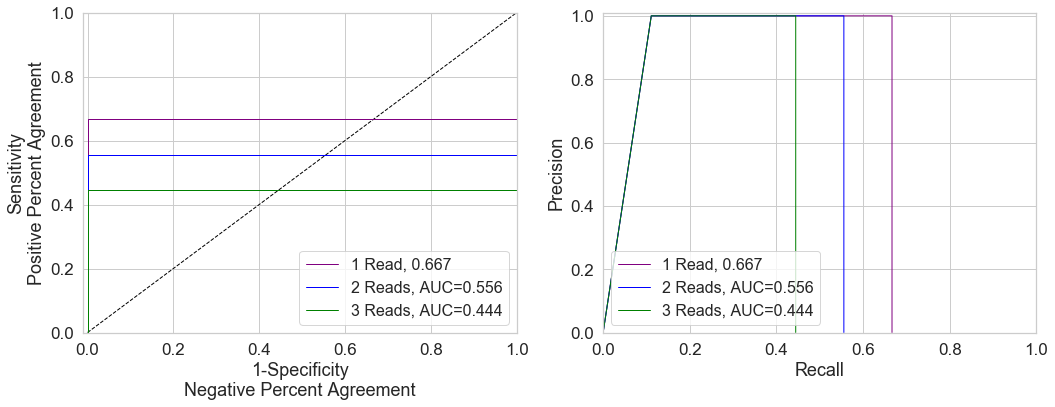

In [5]:
# TRAINING FIGURES

# Fungal Training - varying starting # reads
# ROC

indir = currentWorkingDirectory
    
# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Fun-1read.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Fun-2read.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableC_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Fun-3read.csv"
contingencyTableC_df = pd.read_csv(indir + '/' + contingencyTableSheet)



# will use contingencyTable_df
TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()

TPR_C = contingencyTableC_df['TPR'].tolist()
FPR_C = contingencyTableC_df['FPR'].tolist()
PPV_C = contingencyTableC_df['PPV'].tolist()

aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))
aucC = abs(round(np.trapz(TPR_C,FPR_C),3))

#plt.plot(FPR, TPR, linewidth=2, label=label)
#ax = sns.lineplot(data=contingencyTable_df["a"], color="coral", label="line")



#sns.scatterplot(x="FPR", y="TPR", data=contingencyTable_df)

plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':17, 'xtick.labelsize':17,'ytick.labelsize':17,'legend.fontsize':16})

f, axs = plt.subplots(2,2,figsize=(15,6))


#ROC
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, color='purple', lw=1, label="1 Read, "+str(aucA))
plt.plot(FPR_B,TPR_B, color='blue', lw=1, label="2 Reads, AUC="+str(aucB))
plt.plot(FPR_C,TPR_C, color='green', lw=1, label="3 Reads, AUC="+str(aucC))
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity\nPositive Percent Agreement', fontsize=18)
plt.xlabel('1-Specificity\nNegative Percent Agreement', fontsize=18)
plt.legend(loc=4)


#Precision Recall
plt.subplot(1, 2, 2)
#plt.figure(figsize=(5,5))  
#plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(TPR_A,PPV_A, color='purple', lw=1,  label="1 Read, "+str(aucA))
plt.plot(TPR_B,PPV_B, color='blue', lw=1, label="2 Reads, AUC="+str(aucB))
plt.plot(TPR_C,PPV_C, color='green', lw=1,  label="3 Reads, AUC="+str(aucC))

plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.legend(loc=3)

plt.tight_layout()
#plt.show()
    
    
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-FungalTrain-VaryReads.pdf',format='pdf',transparent=True, bbox_inches='tight')


(-0.01, 1)

(0, 1)

Text(0, 0.5, 'Sensitivity\nPositive Percent Agreement')

Text(0.5, 0, '1-Specificity\nNegative Percent Agreement')

(0, 1)

(0, 1.01)

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

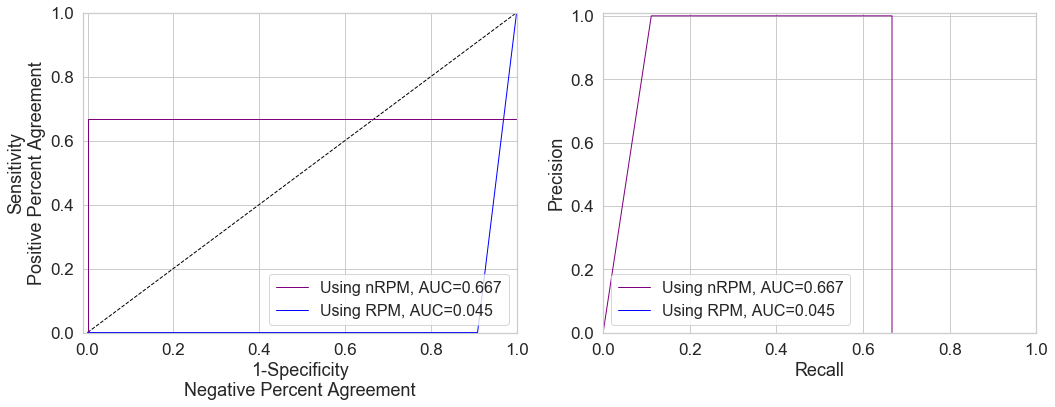

In [7]:
# Fungal Training - Norm or not
# ROC

indir = currentWorkingDirectory
    
# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Fun-1read.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Fun-normOff.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)


# will use contingencyTable_df
TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()


aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))


plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':17, 'xtick.labelsize':17,'ytick.labelsize':17,'legend.fontsize':16})

f, axs = plt.subplots(2,2,figsize=(15,6))


#ROC
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, color='purple', lw=1, label="Using nRPM, AUC="+str(aucA))
plt.plot(FPR_B,TPR_B, color='blue', lw=1, label="Using RPM, AUC="+str(aucB))

plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity\nPositive Percent Agreement', fontsize=18)
plt.xlabel('1-Specificity\nNegative Percent Agreement', fontsize=18)
plt.legend(loc=4)


#Precision Recall
plt.subplot(1, 2, 2)
#plt.figure(figsize=(5,5))  
#plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(TPR_A,PPV_A, color='purple', lw=1,  label="Using nRPM, AUC="+str(aucA))
plt.plot(TPR_B,PPV_B, color='blue', lw=1, label="Using RPM, AUC="+str(aucB))

plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.legend(loc=3)

plt.tight_layout()
#plt.show()
    
    
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-FungalTrain-OnOffNormalization.pdf',format='pdf',transparent=True, bbox_inches='tight')


(-0.01, 1)

(0, 1)

Text(0, 0.5, 'Sensitivity\nPositive Percent Agreement')

Text(0.5, 0, '1-Specificity\nNegative Percent Agreement')

(0, 1)

(0, 1.01)

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

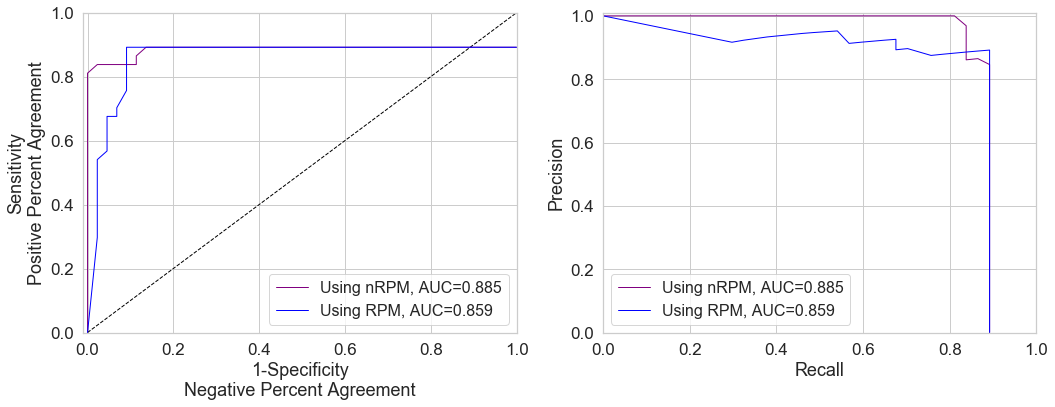

In [8]:
# Bacterial Training - Norm or not
# ROC

indir = currentWorkingDirectory
    
# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-normOff.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)


# will use contingencyTable_df
TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()


aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))


plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':17, 'xtick.labelsize':17,'ytick.labelsize':17,'legend.fontsize':16})

f, axs = plt.subplots(2,2,figsize=(15,6))


#ROC
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, color='purple', lw=1, label="Using nRPM, AUC="+str(aucA))
plt.plot(FPR_B,TPR_B, color='blue', lw=1, label="Using RPM, AUC="+str(aucB))

plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity\nPositive Percent Agreement', fontsize=18)
plt.xlabel('1-Specificity\nNegative Percent Agreement', fontsize=18)
plt.legend(loc=4)


#Precision Recall
plt.subplot(1, 2, 2)
#plt.figure(figsize=(5,5))  
#plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(TPR_A,PPV_A, color='purple', lw=1,  label="Using nRPM, AUC="+str(aucA))
plt.plot(TPR_B,PPV_B, color='blue', lw=1, label="Using RPM, AUC="+str(aucB))

plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.legend(loc=3)

plt.tight_layout()
#plt.show()
    
    
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-BacTrain-OnOffNormalization.pdf',format='pdf',transparent=True, bbox_inches='tight')


(-0.01, 1)

(0, 1)

Text(0, 0.5, 'Sensitivity\nPositive Percent Agreement')

Text(0.5, 0, '1-Specificity\nNegative Percent Agreement')

(0, 1)

(0, 1.01)

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

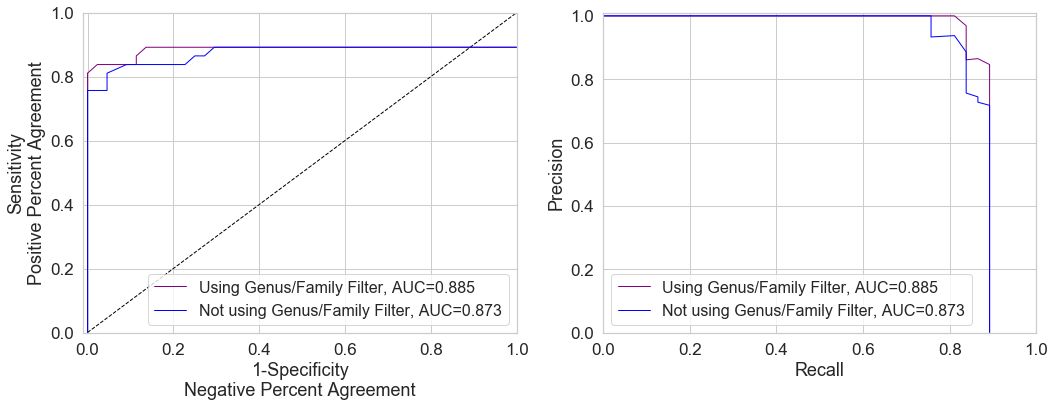

In [9]:
# Bacterial Training - Genus / Family Filter or not
# ROC

indir = currentWorkingDirectory
    
# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-genusFamOff.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)


# will use contingencyTable_df
TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()

aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))


plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':17, 'xtick.labelsize':17,'ytick.labelsize':17,'legend.fontsize':16})

f, axs = plt.subplots(2,2,figsize=(15,6))


#ROC
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, color='purple', lw=1, label="Using Genus/Family Filter, AUC="+str(aucA))
plt.plot(FPR_B,TPR_B, color='blue', lw=1, label="Not using Genus/Family Filter, AUC="+str(aucB))

plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity\nPositive Percent Agreement', fontsize=18)
plt.xlabel('1-Specificity\nNegative Percent Agreement', fontsize=18)
plt.legend(loc=4)


#Precision Recall
plt.subplot(1, 2, 2)
#plt.figure(figsize=(5,5))  
#plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(TPR_A,PPV_A, color='purple', lw=1,  label="Using Genus/Family Filter, AUC="+str(aucA))
plt.plot(TPR_B,PPV_B, color='blue', lw=1, label="Not using Genus/Family Filter, AUC="+str(aucB))

plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.legend(loc=3)

plt.tight_layout()
#plt.show()
    
    
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-BacTrain-OnOffGenusFamilyFilter.pdf',format='pdf',transparent=True, bbox_inches='tight')

(-0.02, 1)

(0, 1.02)

Text(0, 0.5, 'Positive Percent Agreement')

Text(0.5, 0, 'Negative Percent Agreement')

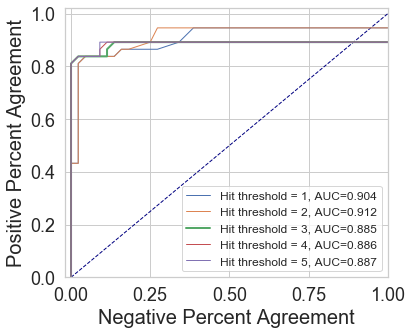

In [10]:
# Graph TPR veruss FPR for ROC
# Bacterial Abs read cutoffs

# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-1read.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-2read.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableC_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac.csv"
contingencyTableC_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableD_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-4read.csv"
contingencyTableD_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableE_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-5read.csv"
contingencyTableE_df = pd.read_csv(indir + '/' + contingencyTableSheet)



# will use contingencyTable_df


TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()

TPR_C = contingencyTableC_df['TPR'].tolist()
FPR_C = contingencyTableC_df['FPR'].tolist()
PPV_C = contingencyTableC_df['PPV'].tolist()

TPR_D = contingencyTableD_df['TPR'].tolist()
FPR_D = contingencyTableD_df['FPR'].tolist()
PPV_D = contingencyTableD_df['PPV'].tolist()

TPR_E = contingencyTableE_df['TPR'].tolist()
FPR_E = contingencyTableE_df['FPR'].tolist()
PPV_E = contingencyTableE_df['PPV'].tolist()


aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))
aucC = abs(round(np.trapz(TPR_C,FPR_C),3))
aucD = abs(round(np.trapz(TPR_D,FPR_D),3))
aucE = abs(round(np.trapz(TPR_E,FPR_E),3))

#plt.plot(FPR, TPR, linewidth=2, label=label)
#ax = sns.lineplot(data=contingencyTable_df["a"], color="coral", label="line")

#sns.scatterplot(x="FPR", y="TPR", data=contingencyTable_df)

plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':18, 'xtick.labelsize':18,'ytick.labelsize':18,'legend.fontsize':12})

f, axs = plt.subplots(1,1,figsize=(6,5))


#ROC

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, lw=1, label="Hit threshold = 1, AUC="+str(aucA))
plt.plot(FPR_B,TPR_B, lw=1, label="Hit threshold = 2, AUC="+str(aucB))
plt.plot(FPR_C,TPR_C, lw=2, label="Hit threshold = 3, AUC="+str(aucC))
plt.plot(FPR_D,TPR_D, lw=1, label="Hit threshold = 4, AUC="+str(aucD))
plt.plot(FPR_E,TPR_E, lw=1, label="Hit threshold = 5, AUC="+str(aucE))




#plt.plot(FPR_E,TPR_E, lw=1, label="CSF, AUC="+str(aucE))
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('Positive Percent Agreement', fontsize=20)
plt.xlabel('Negative Percent Agreement', fontsize=20)
plt.legend(loc=4)


plt.tight_layout()
#plt.show()
    

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-BacTrain-HitThreshold.pdf',format='pdf',transparent=True, bbox_inches='tight')

(-0.02, 1)

(0, 1.02)

Text(0, 0.5, 'Positive Percent Agreement')

Text(0.5, 0, 'Negative Percent Agreement')

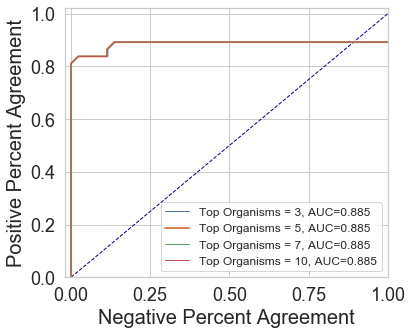

In [11]:
# Graph TPR veruss FPR for ROC
# Bacterial Abs read cutoffs

# read contingencyTableA_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-topOrg3.csv"
contingencyTableA_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableB_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac.csv"
contingencyTableB_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableC_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-topOrg7.csv"
contingencyTableC_df = pd.read_csv(indir + '/' + contingencyTableSheet)

# read contingencyTableD_df
contingencyTableSheet = "contingencyTable_df-rd5-v1Train-Bac-topOrg10.csv"
contingencyTableD_df = pd.read_csv(indir + '/' + contingencyTableSheet)



# will use contingencyTable_df


TPR_A = contingencyTableA_df['TPR'].tolist()
FPR_A = contingencyTableA_df['FPR'].tolist()
PPV_A = contingencyTableA_df['PPV'].tolist()

TPR_B = contingencyTableB_df['TPR'].tolist()
FPR_B = contingencyTableB_df['FPR'].tolist()
PPV_B = contingencyTableB_df['PPV'].tolist()

TPR_C = contingencyTableC_df['TPR'].tolist()
FPR_C = contingencyTableC_df['FPR'].tolist()
PPV_C = contingencyTableC_df['PPV'].tolist()

TPR_D = contingencyTableD_df['TPR'].tolist()
FPR_D = contingencyTableD_df['FPR'].tolist()
PPV_D = contingencyTableD_df['PPV'].tolist()



aucA = abs(round(np.trapz(TPR_A,FPR_A),3))
aucB = abs(round(np.trapz(TPR_B,FPR_B),3))
aucC = abs(round(np.trapz(TPR_C,FPR_C),3))
aucD = abs(round(np.trapz(TPR_D,FPR_D),3))


plt.close()
plt.rcParams.update({'font.size':18, 'axes.labelsize':18, 'xtick.labelsize':18,'ytick.labelsize':18,'legend.fontsize':12})

f, axs = plt.subplots(1,1,figsize=(6,5))


#ROC

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(FPR_A,TPR_A, lw=1, label="Top Organisms = 3, AUC="+str(aucA))
plt.plot(FPR_B,TPR_B, lw=2, label="Top Organisms = 5, AUC="+str(aucB))
plt.plot(FPR_C,TPR_C, lw=1, label="Top Organisms = 7, AUC="+str(aucC))
plt.plot(FPR_D,TPR_D, lw=1, label="Top Organisms = 10, AUC="+str(aucD))




#plt.plot(FPR_E,TPR_E, lw=1, label="CSF, AUC="+str(aucE))
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('Positive Percent Agreement', fontsize=20)
plt.xlabel('Negative Percent Agreement', fontsize=20)
plt.legend(loc=4)


plt.tight_layout()
#plt.show()
    

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('ROC-rd5v1-BacTrain-TopOrg.pdf',format='pdf',transparent=True, bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


All versus plasma: t value:  -2.9797384675024325 ; p value:  0.0034897788671821835
All versus plasma: MannWhitneyUstat:  180.0 ; p value:  0.0015162569148246356
Bac/Fungi: t value:  2.8648335721480103 ; p value:  0.004912805825855578
Bac/Fungi: MannWhitneyUstat:  1459.0 ; p value:  2.0256454194494027e-05
Fungi count: 42 , Bacteria count:  80


Text(0, 0.5, 'Pathogen Burden\n(Normalized Reads per Million)')

Text(0.5, 0, ' ')

(0.01, 100000)

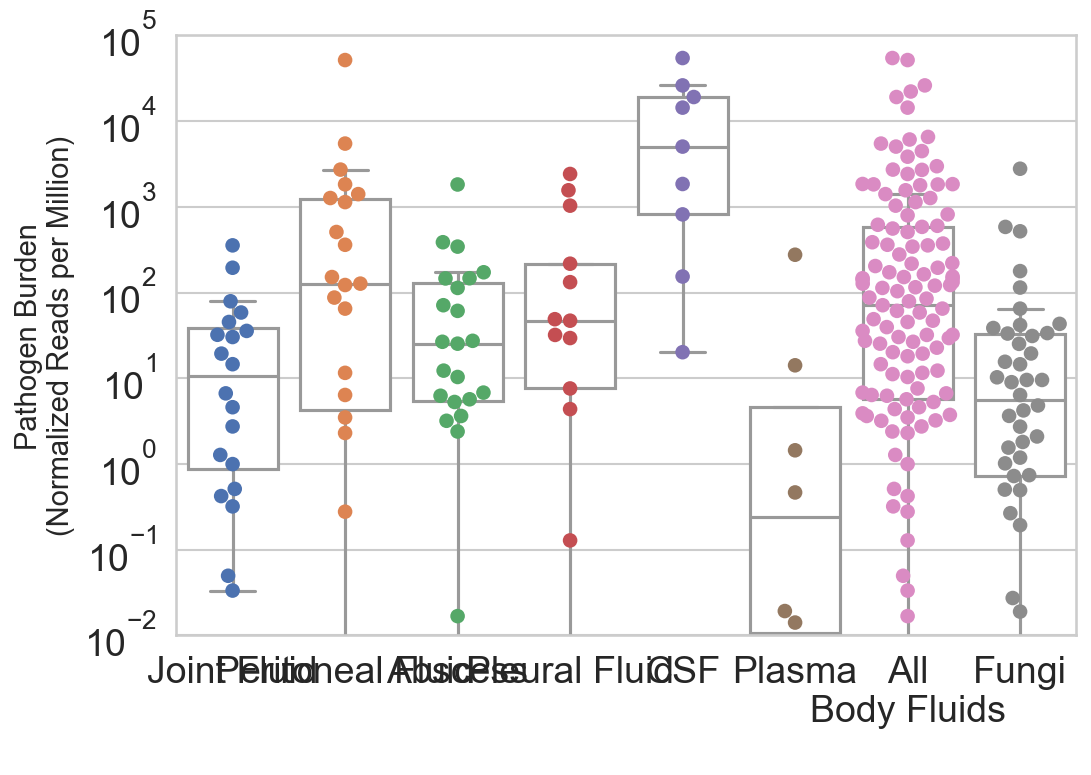

In [13]:
#Illumina version

from matplotlib.pyplot import figure
from scipy import stats
import pandas as pd

indir = currentWorkingDirectory


fullGraphSheet = "fullGraph_df-rd4-v7TrainVal-Bac-colonyCount.csv"
BacFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

fullGraphSheet = "fullGraph_df-rd5-v2TrainVal-Fun-1read.csv"
FunFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

subsetBacFullGraph_df = BacFullGraph_df[BacFullGraph_df['Truth'].isin(['TP','FN'])]
subsetFunFullGraph_df = FunFullGraph_df[FunFullGraph_df['Truth'].isin(['TP','FN'])]

subsetBacFullGraph_df['sampleType']='Bacteria'
subsetFunFullGraph_df['sampleType']='Fungi'

concatFullGraph_df = pd.concat([subsetBacFullGraph_df,subsetFunFullGraph_df])  



fullGraphSheet = "fullGraph_df-rd5-v2TrainValPlasma-Bac-100.csv"
fullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)
#fullGraph_df

sampleType_labels = ['Joint Fluid','Abscess','Peritoneal Fluid','Pleural Fluid','Plasma','CSF']
NOPLASMAsampleType_labels = ['Joint Fluid','Abscess','Peritoneal Fluid','Pleural Fluid','CSF']

#fullGraph_df['UndilutedAdjustedRPM']=(fullGraph_df['adjustedRPM']*fullGraph_df['dilution factor'])
AllSubsetFullGraph_df = fullGraph_df[fullGraph_df['Truth'].isin(['TP','FN'])]
subsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType'].isin(sampleType_labels)]
NOPLASMAsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType'].isin(NOPLASMAsampleType_labels)]

JOINTsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Joint Fluid']
ABSCESSsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Abscess']
PERITONEALsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Peritoneal Fluid']
PLEURALsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Pleural Fluid']
CSFsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='CSF']
BFsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']!='Plasma']
PLASMAsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Plasma']

BFsubsetFullGraph_df['sampleType']='All\nBody Fluids'

concatSubsetFullGraph_df = pd.concat([NOPLASMAsubsetFullGraph_df,PLASMAsubsetFullGraph_df,BFsubsetFullGraph_df,subsetFunFullGraph_df])  


# get p value
t,p = stats.ttest_ind(PLASMAsubsetFullGraph_df['adjustedRPM'].values, BFsubsetFullGraph_df['adjustedRPM'].values, equal_var = False)
print ('All versus plasma: t value: ', t, '; p value: ', p )

MannWhitneyUstat,p = stats.mannwhitneyu(PLASMAsubsetFullGraph_df['adjustedRPM'].values, BFsubsetFullGraph_df['adjustedRPM'].values)
print ('All versus plasma: MannWhitneyUstat: ', MannWhitneyUstat, '; p value: ', p )


# get p value
t,p = stats.ttest_ind(BFsubsetFullGraph_df['adjustedRPM'].values, subsetFunFullGraph_df['adjustedRPM'].values, equal_var = False)
print ('Bac/Fungi: t value: ', t, '; p value: ', p )
MannWhitneyUstat,p = stats.mannwhitneyu(BFsubsetFullGraph_df['adjustedRPM'].values, subsetFunFullGraph_df['adjustedRPM'].values)# ,alternative='less')
print ('Bac/Fungi: MannWhitneyUstat: ', MannWhitneyUstat, '; p value: ', p )


print ('Fungi count:',subsetFunFullGraph_df['sampleType'].size, ', Bacteria count: ',subsetBacFullGraph_df['sampleType'].size)



plt.close()
fig = plt.figure(figsize=(6,4), dpi=150) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_yscale("log") # log first

#f = figure(figsize=(8,5), dpi=150)
fontparams = {'font.size':8, 'axes.labelsize':8, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':10}
plt.rcParams.update(fontparams)

#colorPaletteList = dict(TP='green',FP='red',TN='black', FN='orange')
ax = sns.boxplot(y="adjustedRPM", x="sampleType", data=concatSubsetFullGraph_df, color="white", showfliers=False, ax = log_ax)
ax = sns.swarmplot(y="adjustedRPM", x="sampleType", data=concatSubsetFullGraph_df, size=7, ax = log_ax)
#ax = sns.catplot(y="RPM", x="sampleType", dodge=False, data=subsetFullGraph_df)
#ax = sns.violinplot(y="adjustedRPM", x="sampleType", data=subsetFullGraph_df, inner=None)


plt.ylabel('Pathogen Burden\n(Normalized Reads per Million)', fontsize=14)
plt.xlabel(' ', fontsize=12)
plt.ylim([0.01, 100000])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPMbySample.pdf',format='pdf',transparent=True, bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Fungi count: 42 , Bacteria count:  80


Text(0, 0.5, 'Pathogen Burden\n(Normalized Reads per Million)')

Text(0.5, 0, ' ')

(0.0001, 1000000)

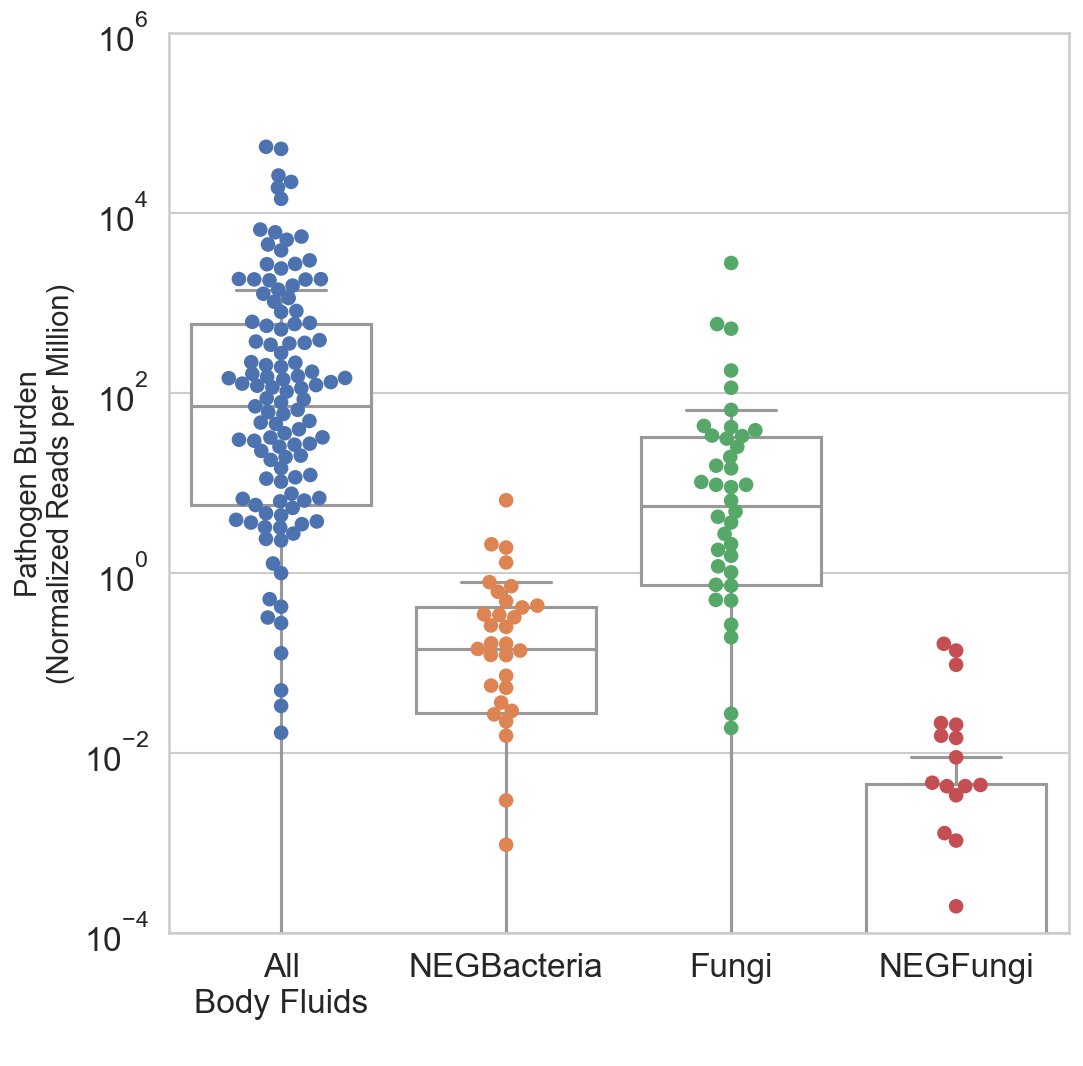

In [14]:
#Illumina version - Negative Samples TN/FP check

from matplotlib.pyplot import figure
from scipy import stats
import pandas as pd

indir = currentWorkingDirectory


fullGraphSheet = "fullGraph_df-rd4-v7TrainVal-Bac-colonyCount.csv"
BacFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

fullGraphSheet = "fullGraph_df-rd5-v2TrainVal-Fun-1read.csv"
FunFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

subsetBacFullGraph_df = BacFullGraph_df[BacFullGraph_df['Truth'].isin(['TP','FN'])]
subsetFunFullGraph_df = FunFullGraph_df[FunFullGraph_df['Truth'].isin(['TP','FN'])]
subsetBacFullGraph_df['sampleType']='Bacteria'
subsetFunFullGraph_df['sampleType']='Fungi'

fullGraphSheet = "fullGraph_df-rd5-v2TrainVal-Neg-Bac.csv"
BacFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

fullGraphSheet = "fullGraph_df-rd5-v2TrainVal-Neg-Fun-1read.csv"
FunFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

subsetNEGBacFullGraph_df = BacFullGraph_df[BacFullGraph_df['Truth'].isin(['TN','FP'])]
subsetNEGFunFullGraph_df = FunFullGraph_df[FunFullGraph_df['Truth'].isin(['TN','FP'])]
subsetNEGBacFullGraph_df['sampleType']='NEGBacteria'
subsetNEGFunFullGraph_df['sampleType']='NEGFungi'



concatFullGraph_df = pd.concat([subsetBacFullGraph_df,subsetNEGBacFullGraph_df,subsetFunFullGraph_df,subsetNEGFunFullGraph_df])  



fullGraphSheet = "fullGraph_df-rd5-v2TrainValPlasma-Bac-100.csv"
fullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)
#fullGraph_df

sampleType_labels = ['Joint Fluid','Abscess','Peritoneal Fluid','Pleural Fluid','Plasma','CSF']
NOPLASMAsampleType_labels = ['Joint Fluid','Abscess','Peritoneal Fluid','Pleural Fluid','CSF']

#fullGraph_df['UndilutedAdjustedRPM']=(fullGraph_df['adjustedRPM']*fullGraph_df['dilution factor'])
AllSubsetFullGraph_df = fullGraph_df[fullGraph_df['Truth'].isin(['TP','FN'])]
subsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType'].isin(sampleType_labels)]
NOPLASMAsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType'].isin(NOPLASMAsampleType_labels)]

JOINTsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Joint Fluid']
ABSCESSsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Abscess']
PERITONEALsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Peritoneal Fluid']
PLEURALsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Pleural Fluid']
CSFsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='CSF']
BFsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']!='Plasma']
PLASMAsubsetFullGraph_df = AllSubsetFullGraph_df[AllSubsetFullGraph_df['sampleType']=='Plasma']

BFsubsetFullGraph_df['sampleType']='All\nBody Fluids'

concatSubsetFullGraph_df = pd.concat([BFsubsetFullGraph_df,subsetNEGBacFullGraph_df,subsetFunFullGraph_df,subsetNEGFunFullGraph_df])  

#concatSubsetFullGraph_df = pd.concat([NOPLASMAsubsetFullGraph_df,PLASMAsubsetFullGraph_df,BFsubsetFullGraph_df,subsetFunFullGraph_df])  


print ('Fungi count:',subsetFunFullGraph_df['sampleType'].size, ', Bacteria count: ',subsetBacFullGraph_df['sampleType'].size)



plt.close()
fig = plt.figure(figsize=(6,6), dpi=150) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_yscale("log") # log first

#f = figure(figsize=(8,5), dpi=150)
fontparams = {'font.size':8, 'axes.labelsize':8, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

#colorPaletteList = dict(TP='green',FP='red',TN='black', FN='orange')
ax = sns.boxplot(y="adjustedRPM", x="sampleType", data=concatSubsetFullGraph_df, color="white", showfliers=False, ax = log_ax)
ax = sns.swarmplot(y="adjustedRPM", x="sampleType", data=concatSubsetFullGraph_df, size=7, ax = log_ax)


plt.ylabel('Pathogen Burden\n(Normalized Reads per Million)', fontsize=14)
plt.xlabel(' ', fontsize=12)
plt.ylim([0.0001, 1000000])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPMbySample-TN.pdf',format='pdf',transparent=True, bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0, 0.5, 'Time to Detection (minutes)')

Text(0.5, 0, ' ')

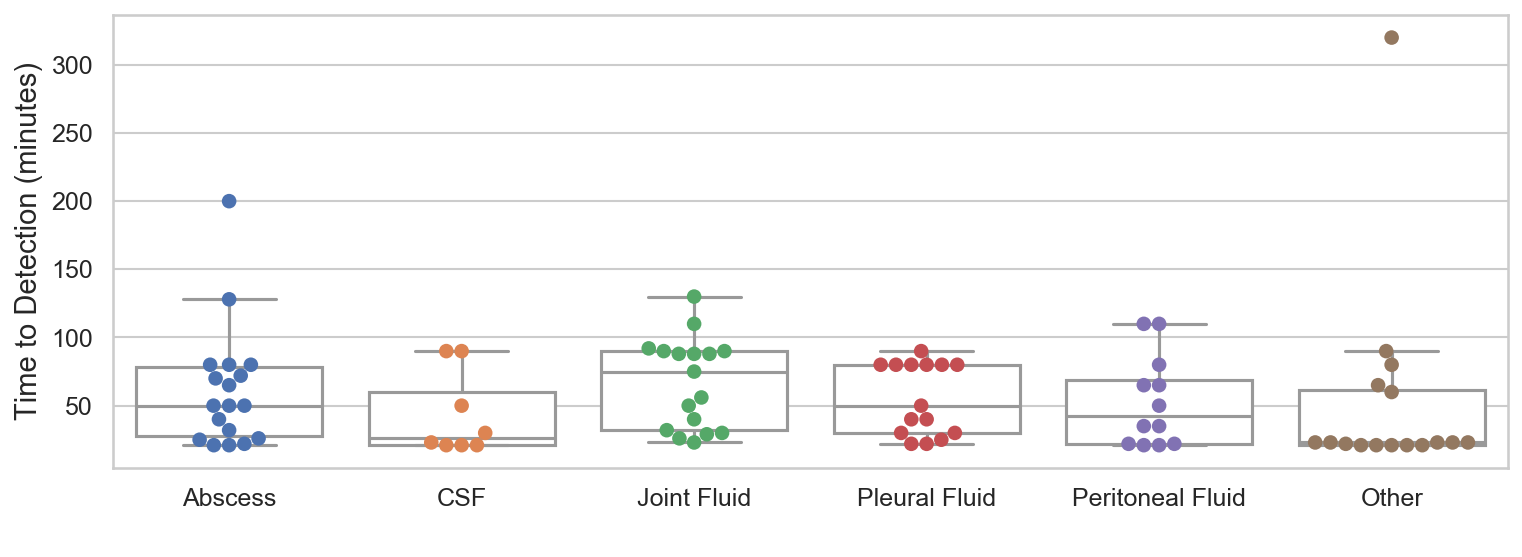

In [15]:
# Nanopore Test to Detection

from matplotlib.pyplot import figure
from scipy import stats
import pandas as pd

indir = currentWorkingDirectory

fullGraphSheet = "nanoporeTTD.csv"
nanoporeGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

sampleType_labels = ['Joint Fluid','Abscess','Peritoneal Fluid','Pleural Fluid','CSF']
subSetNanoporeGraph_df = nanoporeGraph_df[nanoporeGraph_df['Sample Type'].isin(sampleType_labels)]

subSetOtherNanoporeGraph_df = nanoporeGraph_df[~nanoporeGraph_df['Sample Type'].isin(sampleType_labels)]
subSetOtherNanoporeGraph_df['Sample Type']='Other'

concatSubsetFullGraph_df = pd.concat([subSetNanoporeGraph_df,subSetOtherNanoporeGraph_df])  



plt.close()
fig = plt.figure(figsize=(12,4), dpi=150) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_yscale("log") # log first

fontparams = {'font.size':8, 'axes.labelsize':8, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

#colorPaletteList = dict(TP='green',FP='red',TN='black', FN='orange')
#ax = sns.boxplot(y="Sequencing to Detection Time (mins)", x="Sample Type", data=subSetNanoporeGraph_df, color="white", showfliers=False, ax = log_ax)
#ax = sns.swarmplot(y="Sequencing to Detection Time (mins)", x="Sample Type", data=subSetNanoporeGraph_df, size=7, ax = log_ax)

ax = sns.boxplot(y="Sequencing to Detection Time (mins)", x="Sample Type", data=concatSubsetFullGraph_df, color="white", showfliers=False)
ax = sns.swarmplot(y="Sequencing to Detection Time (mins)", x="Sample Type", data=concatSubsetFullGraph_df, size=7)


plt.ylabel('Time to Detection (minutes)', fontsize=14)
plt.xlabel(' ', fontsize=12)
#plt.ylim([0.0001, 1000000])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('nanoporeTTD.pdf',format='pdf',transparent=True, bbox_inches='tight')


In [16]:
subSetNanoporeGraph_df

,Sample #,Sample Type,Organism detected by Nanopore at Validation threshold,nRPM nanopore (1st org if polymicrobial),Total reads after demultiplexing but not preprocessed (Nanopore)*,Sequencing to Detection Time (mins)
0,S1,Abscess,Staphylococcus aureus,106.33,3009473.0,128.0
1,S2,CSF,Klebsiella aerogenes,27155.11,1125313.0,21.0
2,S3,Joint Fluid,Streptococcus agalactiae,197.81,957999.0,23.0
3,S4,CSF,Candida parapsilosis,0.54,1149917.0,30.0
4,S5,Joint Fluid,<negative>,NaN,1322673.0,110.0
5,S6,Abscess,Pseudomonas aeruginosa,340.11,1346626.0,22.0
6,S7,Pleural Fluid,<negative>,NaN,636772.0,80.0
8,S9,Pleural Fluid,Staphylococcus aureus,1114.42,488145.0,30.0
10,S11,Peritoneal Fluid,Staphylococcus aureus,4.12,4856000.0,65.0
11,S12,Joint Fluid,<negative>,NaN,1186712.0,90.0


t value:  0.5369107287366849 ; p value:  0.5921045178434796
mannWhitneyU:  2683.5 ; p value:  0.10338143349602535


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0, 0.5, 'Normalized Reads per Million (RPM)')

Text(0.5, 0, ' ')

(0.01, 100000)

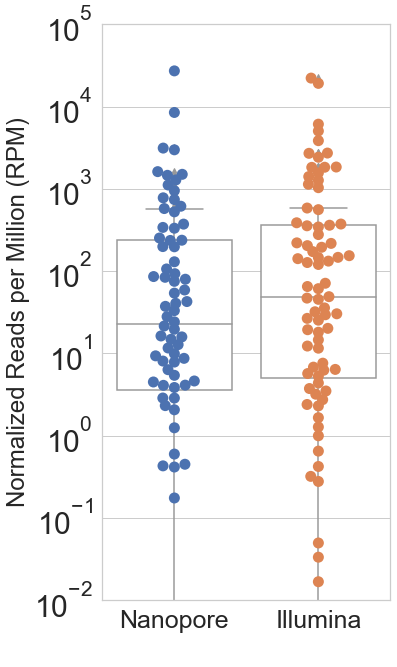

In [17]:
# Illumina versus Nanopore boxplot comparsion

from matplotlib.pyplot import figure
from scipy import stats

fullGraphSheet = "fullGraph_df-rd4-v7TrainVal-Bac-100.csv"
IlluminaFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

fullGraphSheet = "fullGraph_df-rd4-NPv3TrainVal-Bac.csv"
NPFullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)

subsetIlluminaFullGraph_df = IlluminaFullGraph_df[IlluminaFullGraph_df['Truth'].isin(['TP','FN'])]
subsetNPFullGraph_df = NPFullGraph_df[NPFullGraph_df['Truth'].isin(['TP','FN'])]

#fullGraph_df['UndilutedAdjustedRPM']=(fullGraph_df['adjustedRPM']*fullGraph_df['dilution factor'])
#subsetFullGraph_df['UndilutedAdjustedRPM']=(subsetFullGraph_df['adjustedRPM']*subsetFullGraph_df['dilution factor'])

subsetIlluminaFullGraph_df['sequencer']='Illumina'
subsetNPFullGraph_df['sequencer']='Nanopore'

concatFullGraph_df = pd.concat([subsetNPFullGraph_df,subsetIlluminaFullGraph_df])  

# get p value
t,p = stats.ttest_ind(subsetIlluminaFullGraph_df['adjustedRPM'].values, subsetNPFullGraph_df['adjustedRPM'].values, equal_var = False)
print ('t value: ', t, '; p value: ', p)
mannWhitneyU,p = stats.mannwhitneyu(subsetIlluminaFullGraph_df['adjustedRPM'].values, subsetNPFullGraph_df['adjustedRPM'].values)
print ('mannWhitneyU: ', mannWhitneyU, '; p value: ', p)



fig = plt.figure(figsize=(6,4), dpi=150) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_yscale("log") # log first

plt.close()
f = figure(figsize=(4,8))
fontparams = {'font.size':25, 'axes.labelsize':28, 'xtick.labelsize':25,'ytick.labelsize':30,'legend.fontsize':25}
plt.rcParams.update(fontparams)
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = f.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_yscale("log") # log first

#colorPaletteList = dict(TP='green',FP='red',TN='black', FN='orange')
ax = sns.boxplot(y="adjustedRPM", x="sequencer", color="white", data=concatFullGraph_df,ax=log_ax)
ax = sns.swarmplot(y="adjustedRPM", x="sequencer", size=11, data=concatFullGraph_df,ax=log_ax)
#ax = sns.catplot(y="RPM", x="sampleType", dodge=False, data=subsetFullGraph_df)
#ax = sns.violinplot(y="adjustedRPM", x="organism", data=subsetFullGraph_df, inner=None)
ax.set_yscale("log")

plt.ylabel('Normalized Reads per Million (RPM)', fontsize=24)
plt.xlabel(' ', fontsize=24)
plt.ylim([0.01, 100000])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPMbyNPvsIll-bac.pdf',format='pdf',transparent=True, bbox_inches='tight')

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'PCR cycles (Ct)')

Text(0.5, 0, 'Normalized RPM')

(0.01, 1000)

Text(0, 0.5, 'PCR cycles (Ct)')

Text(0.5, 0, 'RPM')

(0.01, 1000)

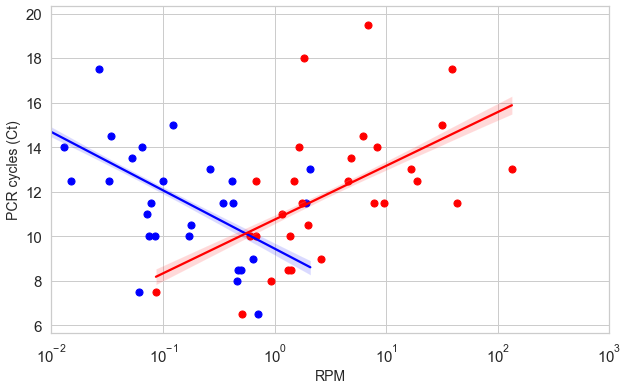

In [20]:
# Showing that Achromobacter xylosoxidans is based on input (cycles)

#fullGraphSheet = "fullGraphAll_df-rd4-v6TrainVal-Bac.csv"
fullGraphSheet = "fullGraphAll_df-rd5-v2TrainVal-Bac.csv"


fullGraph_df = pd.read_csv(indir + '/' + fullGraphSheet)
import matplotlib.pyplot


subsetFullGraph_df = fullGraph_df[fullGraph_df['Truth'].isin(['FP','TN','Extra TN'])]
AchrBacsubsetFullGraph_df = subsetFullGraph_df[subsetFullGraph_df['Species']=='Achromobacter xylosoxidans']
AchrBacsubsetFullGraph_df = AchrBacsubsetFullGraph_df[AchrBacsubsetFullGraph_df['Hits']>=3]

plt.close()
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':15, 'axes.labelsize':15, 'xtick.labelsize':15,'ytick.labelsize':15,'legend.fontsize':15})


#ax = sns.scatterplot(x="adjustedRPM", y="cycles", color='blue',data=AchrBacsubsetFullGraph_df)
ax = sns.regplot(x="adjustedRPM", y="cycles", data=AchrBacsubsetFullGraph_df, color='blue',x_estimator=np.mean, logx=True, truncate=True)

#ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('PCR cycles (Ct)', fontsize=14)
plt.xlabel('Normalized RPM', fontsize=14)
plt.xlim([0.01, 1000])

#ax = sns.scatterplot(x="RPM", y="cycles", color='red', data=AchrBacsubsetFullGraph_df)
ax = sns.regplot(x="RPM", y="cycles", data=AchrBacsubsetFullGraph_df, color='red',x_estimator=np.mean, logx=True, truncate=True)
ax.set_xscale('log')
plt.ylabel('PCR cycles (Ct)', fontsize=14)
plt.xlabel('RPM', fontsize=14)
plt.xlim([0.01, 1000])


plt.rcParams['pdf.fonttype'] = 42
plt.savefig('cycleCorrectionRegression.pdf',format='pdf',transparent=True, bbox_inches='tight')


In [ ]:
# Program to bootstrap data for ROC confidence intervals

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats



indir = os.getcwd()

fullGraphSheet = "fullGraphAll_df-rd5-NPv3ValidateOrig-Bac.csv"
fullGraphAll_df = pd.read_csv(indir + '/' + fullGraphSheet)

#const_subsamplePercent = 0.35
const_subsamplePercent = 1.00

nextRowLabels = ['threshold','TP','FP','TN','FN','TPR','TNR','FPR','PPV','NPV']
nextRowROCLabels = ['threshold','TNR','FPR','FPR_std','FPR_upper','FPR_lower','TPR','TPR_std','TPR_upper','TPR_lower']

# 1. get all unique 'row' and get all unique 'RPMThreshold'
# 2. loop through 1000 times:
# 3.   subsample 35% of all 'row's and remake new dataframe using subset of 'row's
# 4.   loop through each 'RPMThreshold':
# 5.     calculate TPR and FPR, PPV, NPV
# 6.     record 'TPR and FPR, PPV, NPV numbers' into a matrix with RPM threshold x # trial (out of 100). Col: Threshold + TP, FP...
# 7. calculate statistics of TPR, FPR, PPV, NPV.  Get mean and standard deviation of each for each 'RPMThreshold' based on the trials
# 8. plot ROC


#1
sampleUniq = fullGraphAll_df.row.unique()
RPMthresholdUniq = fullGraphAll_df.RPMThreshold.unique()

allIteration_df = pd.DataFrame()
ROCraw_df = pd.DataFrame()

#2
for i in range(2000):
    
#3
    sampleSublist = np.random.choice(sampleUniq, int(const_subsamplePercent*len(sampleUniq)), replace=True)

    allInputSublist_df = fullGraphAll_df[fullGraphAll_df['row'].isin(sampleSublist)]
    
#4
    for threshold in RPMthresholdUniq:
        
        allInputThresholdSublist_df = allInputSublist_df[allInputSublist_df['RPMThreshold']==(float(threshold))]
        truthList = list(allInputThresholdSublist_df['Truth'])
        TP = truthList.count('TP')
        FP = truthList.count('FP')
        TN = truthList.count('TN')
        FN = truthList.count('FN')
#5
        if TP+FN>0:
            TPR=TP/float(TP+FN) # also recall and sensitivity
        else:
            TPR=np.NaN
        if TN+FP>0:
            TNR=TN/float(TN+FP) # also specificity
        else:
            FPR=np.Nan
        FPR=1-TNR # 1-specificity
        if TP+FP>0:
            PPV=TP/float(TP+FP) # also precision
        else:
            PPV=np.NaN
        NPV=TN/float(TN+FN)
        
#6
        nextRow = [(threshold,TP,FP,TN,FN,TPR,TNR,FPR,PPV,NPV)]
        nextRow_df = pd.DataFrame(nextRow, columns=nextRowLabels)
        
        allIteration_df = allIteration_df.append(nextRow_df)
        
#7

#set up the ROC matrix:

nextRow = [(0,1,1,0,1,1,1,0,1,1)]

nextRow_df = pd.DataFrame(nextRow, columns=nextRowROCLabels)
ROCraw_df = ROCraw_df.append(nextRow_df)

for threshold in RPMthresholdUniq:
    thresholdSublist_df = allIteration_df[allIteration_df['threshold']==(float(threshold))]
    TPR_stdev = thresholdSublist_df['TPR'].std()
    TPR_med = thresholdSublist_df['TPR'].median()
    TNR_med = thresholdSublist_df['TNR'].median()
    TPR_upper = np.percentile(thresholdSublist_df['TPR'], 95)
    TPR_lower = np.percentile(thresholdSublist_df['TPR'], 5)
    
    FPR_med = thresholdSublist_df['FPR'].median()
    FPR_stdev = thresholdSublist_df['FPR'].std()
    FPR_upper = np.percentile(thresholdSublist_df['FPR'], 95)
    FPR_lower = np.percentile(thresholdSublist_df['FPR'], 5)
    
    nextRow = [(threshold,TNR_med,FPR_med,FPR_stdev,FPR_upper,FPR_lower,TPR_med,TPR_stdev,TPR_upper,TPR_lower)]
    nextRow_df = pd.DataFrame(nextRow, columns=nextRowROCLabels)
    ROCraw_df = ROCraw_df.append(nextRow_df)

nextRow = [(0,0,0,0,0,0,0,1,0,0)]
nextRow_df = pd.DataFrame(nextRow, columns=nextRowROCLabels)
ROCraw_df = ROCraw_df.append(nextRow_df)
    
ROCraw_df.to_csv('ROCraw_df-rd5-NPv3ValidateOrig-Bac.csv')

(-0.01, 1)

(0, 1.0)

Text(0, 0.5, 'Positive Percent Agreement')

Text(0.5, 0, '1 - Negative Percent Agreement')

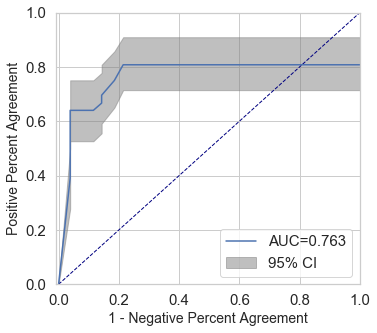

In [21]:
#8 - continuation after correcting for tail of ROC. To do: automate this part

tempROC = "ROCraw_df-rd5-NPv3ValidateOrig-Bac.csv"
ROCraw_df = pd.read_csv(indir + '/' + tempROC)

plt.close()
plt.rcParams.update({'font.size':15, 'axes.labelsize':15, 'xtick.labelsize':15,'ytick.labelsize':15,'legend.fontsize':15})

f, axs = plt.subplots(1,1,figsize=(12,5))

TPR = ROCraw_df['TPR'].tolist()
TNR = ROCraw_df['TNR'].tolist()
FPR = ROCraw_df['FPR'].tolist()
#TPR_std = ROCraw_df['TPR_std'].tolist()
TPR_lower = ROCraw_df['TPR_lower'].tolist()
TPR_upper = ROCraw_df['TPR_upper'].tolist()



auc = abs(round(np.trapz(TPR,FPR),3))

#ROC
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.plot(FPR,TPR,label="AUC="+str(auc))
plt.fill_between(FPR, TPR_lower, TPR_upper, color='grey', alpha=0.5,
                 label='95% CI')


plt.xlim([-0.01, 1])
plt.ylim([0, 1.0])
plt.ylabel('Positive Percent Agreement', fontsize=14)
plt.xlabel('1 - Negative Percent Agreement', fontsize=14)
#plt.grid()
plt.legend(loc=4)


plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPM-CI-rd5-NPv3ValidateOrig-Bac.pdf',format='pdf',transparent=True, bbox_inches='tight')


<Figure size 648x648 with 0 Axes>

Text(0, 0.5, 'Nanopore nRPM')

Text(0.5, 0, 'Illumina nRPM')

(0, 5)

(-0.2, 5)

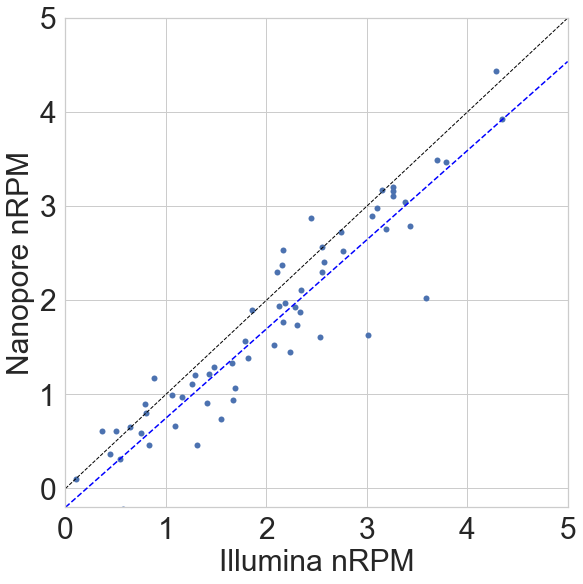

In [24]:
# Plotting out scatter of Illumina RPM versus Nanopore RPM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os

global indir
global graph_root
currentWorkingDirectory = os.getcwd()
indir = currentWorkingDirectory
graph_root = currentWorkingDirectory + '/plots'

#allReads_df = pd.read_excel(indir+'/'+'RPMCompareIlNP-rd4V1.xlsx', sheet_name='Graph', header=1, skip_footer=0)
allReads_df = pd.read_csv(indir + '/' +'RPMCompareIlNP-rd4V3-3.csv', encoding = "utf-8")


sns.set_style("whitegrid")

plt.close()
plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size':20, 'axes.labelsize':30, 'xtick.labelsize':30,'ytick.labelsize':30,'legend.fontsize':15})


#ax = sns.regplot(x="Pathogen", y="count", data=pathogenReads_df);
#ax = sns.regplot(x="All Reads", y="count", data=allReads_resampled_df);

ax = sns.scatterplot(x="log adjusted RPM Illumina", y="log nanopore adjusted RPM", data=allReads_df,linewidth=0);

plt.plot([0, 5], [0, 5], color='black', lw=1, linestyle='--')
plt.plot([0, 5], [-0.2, 4.538], color='blue', lw=1.5, linestyle='--')
# linear regression of the logs:    rd4v3: y = 0.9474x - 0.1986, R² = 0.84501


#ax = sns.lineplot(x="Pathogen", y="count", data=pathogenReads2_df);
#ax = sns.lineplot(x="Pathogen", y="count", data=pathogenReads_df);
#ax = sns.lineplot(x="All Reads", y="count", data=allReads_resampled_df);

#ax.set(xscale="log", yscale="log")
#ax.set_yscale('log')

plt.ylabel('Nanopore nRPM', fontsize=30)
plt.xlabel('Illumina nRPM', fontsize=30)
plt.xlim([0, 5])
plt.ylim([-0.2, 5])


fig = ax.get_figure()


plt.rcParams['pdf.fonttype'] = 42
plt.savefig('RPMCompareIlNP-rd4V3.pdf',format='pdf',transparent=True, bbox_inches='tight')

In [28]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


global indir
global graph_root
currentWorkingDirectory = os.getcwd()
indir = currentWorkingDirectory
graph_root = currentWorkingDirectory + '/plots'


#which files
sampleName = "S88"
pathogenFile = "BF545-1.5m.Klebsiella_aerogenes.times"
allReadsFile = "BF545-1.5mCrop.all.times"

everyRow = 50

#--

pathogenReads_df = pd.read_csv(indir+'/'+pathogenFile, sep='\t', header=None,usecols=[1],names=['pathogenSec'])
allReads_df = pd.read_csv(indir+'/'+allReadsFile, sep='\t', header=None,usecols=[1],names=['allSec'])


pathogenReads_df.index = pathogenReads_df.index + 1
pathogenReads_df['count'] = pathogenReads_df.index
pathogenReads_df['Pathogen'] = pathogenReads_df.pathogenSec / 60




allReads_resampled_df = allReads_df[allReads_df.index % everyRow == 0] 
allReads_resampled_df = allReads_resampled_df.reset_index()
allReads_resampled_df.index = allReads_resampled_df.index + 1
allReads_resampled_df['count'] = (allReads_resampled_df.index - 1)*everyRow+1
allReads_resampled_df['All Reads'] = allReads_resampled_df.allSec / 60

<Figure size 576x432 with 0 Axes>

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Time (min)')

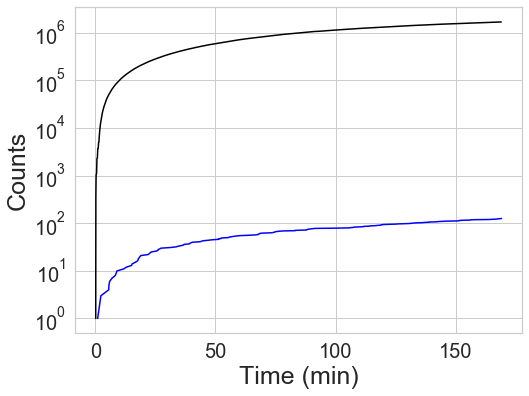

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style("whitegrid")

plt.close()
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size':25, 'axes.labelsize':25, 'xtick.labelsize':20,'ytick.labelsize':20,'legend.fontsize':25})

ax = sns.lineplot(x="Pathogen", y="count", data=pathogenReads_df,color='blue');
ax = sns.lineplot(x="All Reads", y="count", data=allReads_resampled_df, color="black");

ax.set_yscale('log')
plt.ylabel('Counts', fontsize=25)
plt.xlabel('Time (min)', fontsize=25)

fig = ax.get_figure()
fig.savefig(sampleName+'.pdf')


(0, 1000)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length (base pairs)')

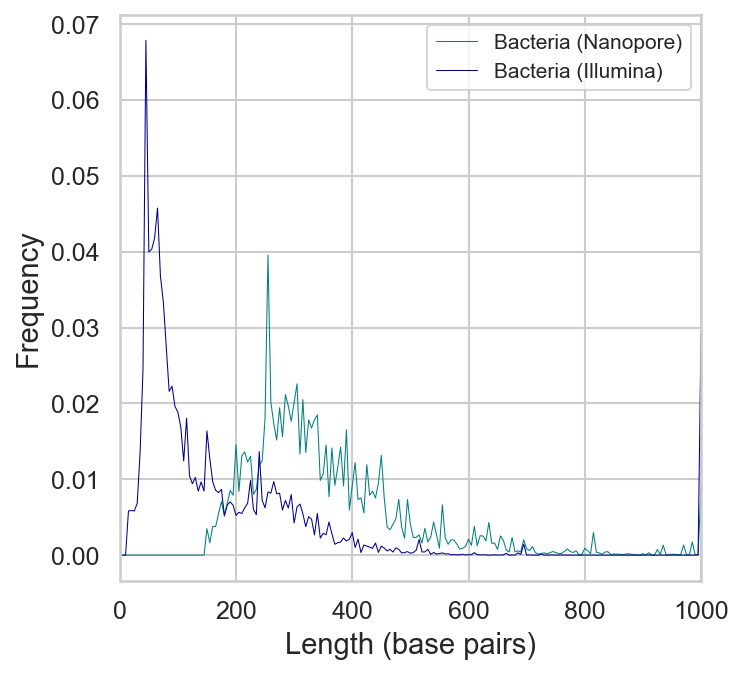

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

plt.rcParams['pdf.fonttype'] = 42

bacHisto_df = pd.read_pickle('bacHistoNanopore_df.pkl') 
#bacHisto_df = pd.read_pickle('bacHistoDis_df.pkl') 

bacHistoIllumina_df = pd.read_pickle('bacHistoIllumina_df.pkl') 

plt.close()
#plt.style.use('fivethirtyeight')
fontparams = {'font.size':15, 'axes.labelsize':18, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

f = figure(figsize=(5,5), dpi=150)


x = bacHisto_df['length']
y = bacHisto_df['sum']
line = plt.plot(x, y, label='Bacteria (Nanopore)', color='teal', linestyle='-',linewidth=0.5, markersize=1)


y = bacHistoIllumina_df['sum']
line = plt.plot(x, y, label='Bacteria (Illumina)', color='darkblue', linestyle='-',linewidth=0.5, markersize=1)


#y = funHisto_df['sum']
#line = plt.plot(x, y, label='Fungi', linestyle='-', marker='o',linewidth=0.5, markersize=1)



#y = humanHisto_df['sum']
#line = plt.plot(x, y, label='Human', linestyle='-', marker='o',linewidth=0.5, markersize=1)


plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Length (base pairs)', fontsize=14)
plt.legend(loc=1)


f.savefig('lenBac.pdf',format='pdf',bbox_inches='tight', transparent=True)

(0, 600)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length (base pairs)')

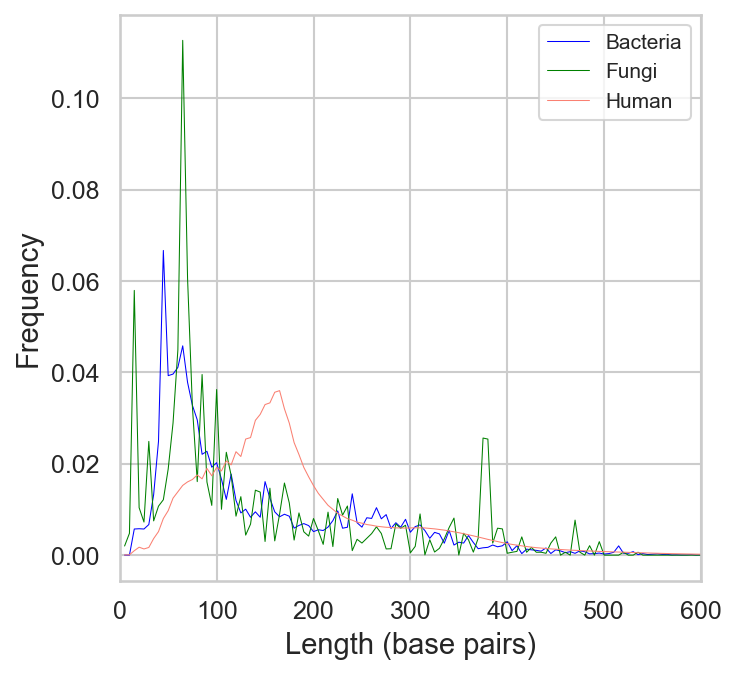

In [9]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['pdf.fonttype'] = 42

plt.close()
#plt.style.use('fivethirtyeight')
fontparams = {'font.size':15, 'axes.labelsize':18, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

f = figure(figsize=(5,5), dpi=150)



x = bacHisto_df['length']

y = bacHisto_df['sum']
line = plt.plot(x, y, label='Bacteria', linestyle='-', color='blue', linewidth=0.5, markersize=1)

y = funHisto_df['sum']
line = plt.plot(x, y, label='Fungi', linestyle='-', color='green', linewidth=0.5, markersize=1)

y = humanHisto_df['sum']
line = plt.plot(x, y, label='Human', linestyle='-', color='salmon', linewidth=0.5, markersize=1)


plt.xlim([0, 600])
#plt.ylim([0, 1])
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Length (base pairs)', fontsize=14)
plt.legend(loc=1)

#plt.savefig("temp.pdf",bbox_inches='tight',format='pdf')
f.savefig('lenBacFungi.pdf',format='pdf',bbox_inches='tight', transparent=True)

(0, 1000)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length (base pairs)')

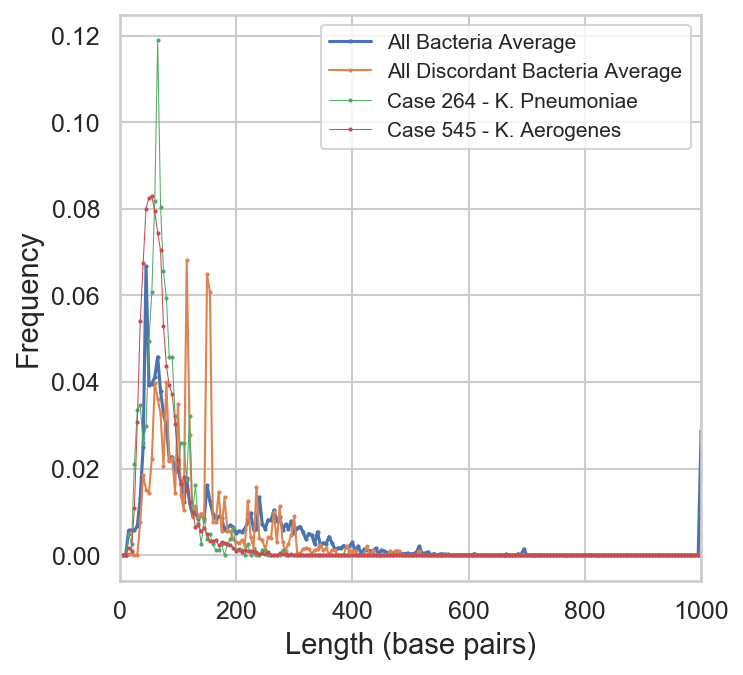

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['pdf.fonttype'] = 42

plt.close()
#plt.style.use('fivethirtyeight')
fontparams = {'font.size':15, 'axes.labelsize':18, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

f = figure(figsize=(5,5), dpi=150)



bacHisto_df = pd.read_pickle('bacHistoDis_df.pkl') 

#organism = allHisto_df.iloc[1,:]
x = bacHisto_df['length']
y = bacHisto_df['sum']

line = plt.plot(x, y, label='All Bacteria Average', linestyle='-', marker='o',linewidth=1.5, markersize=1)


y = bacHisto_df['sumDiscordant']
line = plt.plot(x, y, label='All Discordant Bacteria Average', linestyle='-', marker='o',linewidth=1.0, markersize=1)



y = bacHisto_df['264-KlebsiellaPneumoniae']
line = plt.plot(x, y, label='Case 264 - K. Pneumoniae', linestyle='-', marker='o',linewidth=0.5, markersize=1)

y = bacHisto_df['545-EnterobacterAerogenes']
line = plt.plot(x, y, label='Case 545 - K. Aerogenes', linestyle='-', marker='o',linewidth=0.5, markersize=1)


plt.xlim([0, 1000])
#plt.ylim([0, 0.015])
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Length (base pairs)', fontsize=14)
plt.legend(loc=1)

#plt.savefig("temp.pdf",bbox_inches='tight',format='pdf')
f.savefig('264-545LenIlluminaDis.pdf',format='pdf',bbox_inches='tight', transparent=True)

(0, 600)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length (base pairs)')

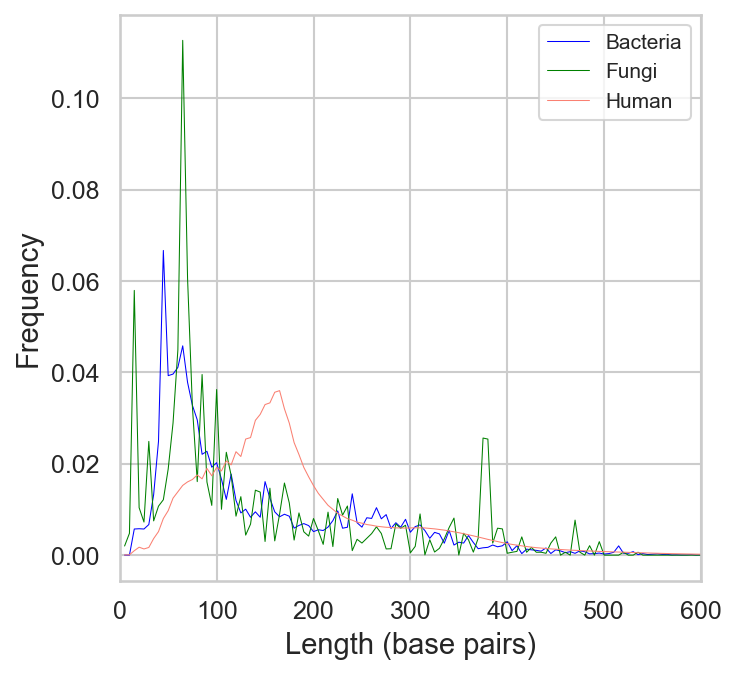

In [7]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['pdf.fonttype'] = 42

plt.close()
#plt.style.use('fivethirtyeight')
fontparams = {'font.size':15, 'axes.labelsize':18, 'xtick.labelsize':12,'ytick.labelsize':12,'legend.fontsize':10}
plt.rcParams.update(fontparams)

f = figure(figsize=(5,5), dpi=150)




bacHisto_df = pd.read_pickle('bacHistoDis_df.pkl') 
funHisto_df = pd.read_pickle('funHisto_df.pkl') 
humanHisto_df = pd.read_pickle('humanHisto_df.pkl') 


x = bacHisto_df['length']

y = bacHisto_df['sum']
line = plt.plot(x, y, label='Bacteria', linestyle='-', color='blue', linewidth=0.5, markersize=1)

y = funHisto_df['sum']
line = plt.plot(x, y, label='Fungi', linestyle='-', color='green', linewidth=0.5, markersize=1)

y = humanHisto_df['sum']
line = plt.plot(x, y, label='Human', linestyle='-', color='salmon', linewidth=0.5, markersize=1)


plt.xlim([0, 600])
#plt.ylim([0, 1])
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Length (base pairs)', fontsize=14)
plt.legend(loc=1)

#plt.savefig("temp.pdf",bbox_inches='tight',format='pdf')
f.savefig('lenBacFungi.pdf',format='pdf',bbox_inches='tight', transparent=True)


In [ ]:
import pandas as pd
bacHisto_df.to_pickle('bacHistoIllumina_df.pkl') 


bacHistoIllumina_df = pd.read_pickle('bacHistoIllumina_df.pkl') 